# **Navigator: v1.0.0 - GNSS Toolkit**

## **Introduction**


The Navigator is a python based GNSS library and toolkit tailored for GNSS PVT solutions. It provides a uniform object-oriented API to do baisc GNSS data processing, including RINEX parsing, satellite position calculation, and user PVT calculation. The library is well documented and easy to use. It also provides a set of CLI tools for RINEX data collection from public FTP servers.


### **Submodules**
There are five submodules in the Navigator library, each of which serves a specific purpose. The following is a brief description of each submodule:

1. **parse** \
    This module houses tools for parsing [RINEX](https://igs.org/wg/rinex/) files, supporting RINEXv3 and RINEXv2. It proficiently parses observation and navigation files into a [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), serving as the backend data format for processing.

2. **satlib**\
    This module incorporates mathematical tools for computing satellite and user positions. It divides into two key segments:
    1. **satellite**\
        This section encompasses the satellite class and its associated methods, including the computation of satellite positions, velocities, and clock corrections. 
        
    2. **triangulate**\
        This module contains various methods for computing user positions, including the least-squares method, the weighted least-squares method, and the Kalman filter method.

3. **download**\
    Primarily used for fetching RINEX files from [CDDIS](https://cddis.nasa.gov/Data_and_Derived_Products/CDDIS_Archive_Access.html) and others FTP servers, this module handles both RINEXv2 and RINEXv3 downloads. While users typically don't interact with this module programmatically, CLI tools are available for this purpose.

4. **utility**\
    Encompassing various utility functions within the library, including the *Epoch Class*, *Transformations*, *CLI Tools*, etc.

5. **dispatch**\
    Though currently unimplemented, this module is intended for potential future utilization, specifically for scaling the library to a distributed system for processing extensive datasets.


## **Installation**


To install the library, user need to clone the repository from **Pntf Lab Server**(*10.116.24.69*) which is only accessible to authorized lab members. To use the **Lab Git Server**, user need to have access to the git user account. If you don't have access to the git user account, please contact the lab administrator.

**Note: The server is only accessible from the UA network. If you are not on the UA network, you need to connect to the UA VPN first.**

The repository can be cloned using the following command which requires git user account password:
```bash
git clone -b main git@10.116.24.69:/home/git/Navigator.git
```

### Bash Installation Script
Here is the bash script for installing the Navigator library. The script will install the library and all the dependencies. It will also create a virtual environment for the library. The script is tested on Ubuntu 22.04.1 LTS. It should work on other Linux distributions as well.
```bash
#!/bin/bash

# Check if python3 is installed or not
if ! command -v python3 &> /dev/null
then
    echo "Python3 is not installed. Please install python3 first."
    exit
fi

# Check if pip is installed or not
if ! command -v pip3 &> /dev/null
then
    echo "pip3 is not installed. Please install pip3 first."
    exit
fi

# Create a virtual environment for the library
python3 -m venv .navigator

# Activate the virtual environment
source .navigator/bin/activate

# Clone the repository from the lab git server
git clone -b main git@10.116.24.69:/home/git/Navigator.git

# Install the library and all the dependencies
pip install Navigator/

# Delete the cloned repository
if [ -d "Navigator" ]; then
    rm -rf Navigator
fi

# Print the installation message
echo "Navigator library is installed successfully."
echo "To use the library, please activate the virtual environment first."
echo "To activate the virtual environment, run the following command:"
echo "source .navigator/bin/activate"
```

**Note: We assumed python3 is installed on the system. If python3 is not installed, please install it first.**



## **Documentation**


The illustration of basic usage of library is provided in the `/docs` directory of the repository. To generate the API documentation, activate the virtual environment and run the following command:
```bash
pdoc -o $DOC_DIR -d google navigator
```
where `$DOC_DIR` is the directory where the documentation will be generated. The documentation will be generated in the `$DOC_DIR/navigator` directory. To view the documentation, open the `index.html` file in the `$DOC_DIR/` directory in a web browser.

## **Usage**


The introduction usage of the library is documented in the *docs* directory. It provides basic usage of the library and its modules. Curretly available introductory notebooks are:
1. [Intro to Parsing](../../intro/intro_parsing_and_interpolation.ipynb)
2. [Intro to Traingulation](../../intro/intro_triangulation.ipynb)
3. [Intro to Epoch Directory](../../intro/epoch_directory_tutorial.ipynb)
4. [Intro to SP3 Orbit](../../intro/intro_sp3_orbit.ipynb)
5. [Intro to Unscented Kalman Filter](../../intro/unscented_kalman_filter_gps.ipynb)

Other notebooks will be added in the future to provide more detailed usage of the library.

## **Data Collection and File Formats**

### **File Formats and Definitions**

To perform SPP (Single Point Positioning) and PPP (Precise Point Positioning), generally many data and file formats are required (see [fileformats](https://gssc.esa.int/education/library/standards-and-data-formats/)).

There are two main files need to perorm the SPP. These files are:
1. [RINEX Observation File](https://server.gage.upc.edu/gLAB/HTML/Observation_Rinex_v3.01.html)\
    The observtional file is recorded by the receiver and contains the *pseudorange* and *carrier phase* measurements of the satellites.
    
- [RINEX Navigation File](https://server.gage.upc.edu/gLAB/HTML/GPS_Navigation_Rinex_v3.04.html)\
    The navigation file contains the satellite ephemeris data which is used to compute the satellite position.


A useful visual representation of the data and file formats is available [here](https://gage.upc.edu/en/learning-materials/library/gnss-format-descriptions).


### **Data Collection**

The data collection is done by using publicly available FTP servers. The primary source of the data is the [CDDIS](https://cddis.nasa.gov/Data_and_Derived_Products/CDDIS_Archive_Access.html) server. The data is collected using the download tools provided by the library.

There are two way of downloading the files from the FTP server.

- Using API provided by download module
- Using CLI tools provided by navigator library (Recommended)

 Two CLI tools are available for downloading the data. These tools are:
- rinex3-download-nasa (For downloading RINEXv3 files)
- rinex3-dir-ops (For standerdizing the directory structure of the downloaded files)

The command line tools are accessible only after activating the virtual environment where the navigator library is installed. To activate the virtual environment, run the following command:
```bash
source .navigator/bin/activate
```

For convenience, the API tools are demonstrated below. The CLI tools are easy to use and are self explanatory. 


In [1]:
# Let's make a temorary directory to store the downloaded files
import tempfile
from pathlib import Path

# Get the path to the temporary directory
tmpdir = Path(tempfile.mkdtemp())

Now that the temporary directory is created, we can download the data into it!

In [3]:
# Import the downloader function
from navigator.download import NasaCddisV3

# Create a downloader object
downloader = NasaCddisV3(logging=True, threads=5) # Threads is optional but recommended for faster downloads

2024-01-12 20:50:17,987 - navigator.download.idownload.rinex.nasa_cddis - INFO - Instantiating NasaCddisV3 with email: anonymous@gmail.com


Now let's download the rinex data pairs form the server!

In [4]:
# Fetch the files
# We will download data from 2021/01/07 for CUSV00 station
downloader.download(
    year=2021,
    day =7 , # Days must be from [1, 366]
    save_path=tmpdir,
    match_string="CUSV00"
)

2024-01-12 20:52:36,051 - navigator.download.idownload.rinex.nasa_cddis - INFO - Default OBS Path: /pub/gnss/data/daily/2021/007/21d
2024-01-12 20:52:36,053 - navigator.download.idownload.rinex.nasa_cddis - INFO - Default NAV Path: /pub/gnss/data/daily/2021/007/21n
2024-01-12 20:52:37,752 - navigator.download.idownload.rinex.nasa_cddis - INFO - Number of OBS Files: 329
2024-01-12 20:52:37,752 - navigator.download.idownload.rinex.nasa_cddis - INFO - Number of NAV Files: 135
2024-01-12 20:52:37,753 - navigator.download.idownload.rinex.nasa_cddis - INFO - Filtered Stations: ['CUSV00THA']
2024-01-12 20:52:37,753 - navigator.download.idownload.rinex.nasa_cddis - INFO - Getting file pairs!
2024-01-12 20:52:37,754 - navigator.download.idownload.rinex.nasa_cddis - INFO - Number of File Pairs: 1
2024-01-12 20:52:37,754 - navigator.download.idownload.rinex.nasa_cddis - INFO - Number of Files to Download: 2
2024-01-12 20:52:40,583 - navigator.download.idownload.rinex.nasa_cddis - INFO - Download 

Let's see what's in the directory now!

In [6]:
!tree {tmpdir}

/tmp/tmpw1z_mpfv
├── CUSV00THA_R_20210070000_01D_30S_MO.crx.gz
└── CUSV00THA_R_20210070000_01D_GN.rnx.gz

0 directories, 2 files


We seem to have downloaded two RINEX files  obs and nav from "CUSV00" IGS station.

### **Data Processing**

Now that we have the data downloaded and standerized, we can use the navigator module to process the data. The processing of the data is done by using the `parse` libray. Let's see how we can parse the data.

In [7]:
# Lets first wrap all our paths in Path objects
from pathlib import Path

# Tempdir path 
tmpdir = Path(tmpdir)

# Let's get the path to the files
nav_file = list(tmpdir.rglob("*GN*"))[0] # We use glob to find the file. Since nav files have GN in their name, we use that as a pattern
obs_file = list(tmpdir.rglob("*MO*"))[0] # We use glob to find the file. Since obs files have MO in their name, we use that as a pattern

# Note that globbing only works if there is only one file in the directory. If there are more than one, we need to manually select the file we want


In [8]:
# Let's see what are the paths to the files
print(f"Path to the nav file: {nav_file}")
print(f"Path to the obs file: {obs_file}")

Path to the nav file: /tmp/tmpw1z_mpfv/CUSV00THA_R_20210070000_01D_GN.rnx.gz
Path to the obs file: /tmp/tmpw1z_mpfv/CUSV00THA_R_20210070000_01D_30S_MO.crx.gz


Let's get our parser ready to parse the data into a pandas dataframe for data analysis.

In [9]:
# Import parser 
from navigator.parse import Parser, IParseGPSNav, IParseGPSObs

# Let's create a parser object for respective files
nav_parser = Parser(iparser=IParseGPSNav())
obs_parser = Parser(iparser=IParseGPSObs())


Let's parse the data into a pandas dataframe. This will take some time depending on the size of the data.

In [10]:
nav_metadata , nav_data = nav_parser(filepath=nav_file)
obs_metadata , obs_data = obs_parser(filepath=obs_file)

Now the data is parsed, we can see the contents of the dataframe.

In [11]:
# Let's see what obs data we have
obs_data.head()

C1C           L1C    S1C  ...  C1X  L1X  S1X
time       sv                                      ...               
2021-01-07 G05  2.525138e+07  1.326969e+08  35.50  ...  NaN  NaN  NaN
           G10  2.454162e+07  1.289671e+08  38.75  ...  NaN  NaN  NaN
           G12  2.530140e+07  1.329597e+08  35.75  ...  NaN  NaN  NaN
           G15  2.207962e+07  1.160292e+08  45.50  ...  NaN  NaN  NaN
           G18  2.069936e+07  1.087759e+08  46.50  ...  NaN  NaN  NaN

[5 rows x 18 columns]

As you can see, the observational data are structured by (time, sv) coordinate. The time here is in (GPS time) which also contains reciever 
clock bias since it it recorded by the reciever.

In [12]:
# Let's see what nav data we have
nav_data.head()

SVclockBias  SVclockDrift  ...  spare0  spare1
time                sv                              ...                
2021-01-07 01:59:44 G32     0.000013  2.160050e-12  ...     NaN     NaN
2021-01-07 02:00:00 G05    -0.000030 -1.023182e-12  ...     NaN     NaN
                    G10    -0.000033 -8.640200e-12  ...     NaN     NaN
                    G12     0.000016 -5.229595e-12  ...     NaN     NaN
                    G13     0.000083  4.092726e-12  ...     NaN     NaN

[5 rows x 31 columns]

The navigation data are structured by (time, sv) coordinate. The time here is in (GPS time) which contains the satellite clock bias since it is recorded by the satellite. 

##  **Ephemris Data and Satellite Position in ECEF Frame**

In [13]:
from navigator.satlib import Satellite, IGPSEphemeris

# Create a gps satellite object
sat = Satellite(iephemeris=IGPSEphemeris())

Let's plot the trajectory of the satellite for two hours from the t_sv.

In [14]:
# Data of zero hour
hr0 = nav_data.index[:2]
data_hr0 = nav_data.loc[hr0]
data_hr0.head()

,,SVclockBias,SVclockDrift,SVclockDriftRate,IODE,Crs,DeltaN,M0,Cuc,Eccentricity,Cus,sqrtA,Toe,Cic,Omega0,Cis,Io,Crc,omega,OmegaDot,IDOT,CodesL2,GPSWeek,L2Pflag,SVacc,health,TGD,IODC,TransTime,FitIntvl,spare0,spare1
time,sv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-07 01:59:44,G32,0.000013,2.160050e-12,0.0,33.0,-43.53125,4.534117e-09,-3.106377,-2.199784e-06,0.004395,0.000010,5153.62254,352784.0,5.215406e-08,1.144711,-4.097819e-08,0.956833,188.31250,-2.459584,-7.968903e-09,-2.064372e-10,1.0,2139.0,0.0,2.0,0.0,4.656613e-10,33.0,349350.0,4.0,NaN,NaN
2021-01-07 02:00:00,G05,-0.000030,-1.023182e-12,0.0,75.0,-17.12500,4.880918e-09,3.073867,-8.866191e-07,0.006015,0.000006,5153.78969,352800.0,5.029142e-08,0.070278,-5.960464e-08,0.955130,268.28125,0.890539,-8.240700e-09,1.410773e-10,1.0,2139.0,0.0,2.0,0.0,-1.117587e-08,75.0,345660.0,4.0,NaN,NaN


In [16]:
# Let's get timestamp of the first row
t_sv = data_hr0.index[0][0]
t_sv

Timestamp('2021-01-07 01:59:44')

Let's get the two hours of data from the t_sv and plot the trajectory of the satellite.

In [17]:
trajectory = sat.trajectory(
    t_sv=t_sv, metadata=None, data=data_hr0, interval=2 * 60 * 60, step=100
);

Let's plot the trajectory.

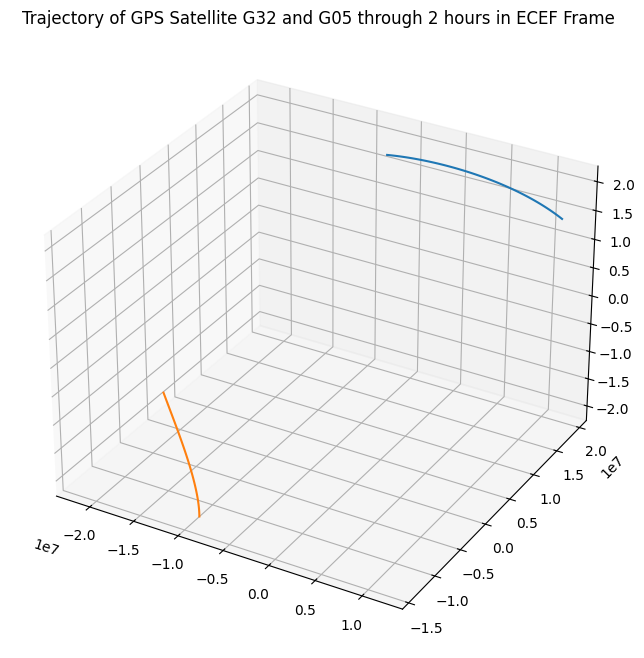

In [20]:
import matplotlib.pyplot as plt

# Plot the trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Trajectory of GPS Satellite G32 and G05 through 2 hours in ECEF Frame')
for i in range(trajectory.shape[0]):  # For each satellite
    ax.plot(trajectory[i][0], trajectory[i][1], trajectory[i][2])  # Plot

If we try to interplote to more that 150 minutes, we will get exponential error in satellite position.

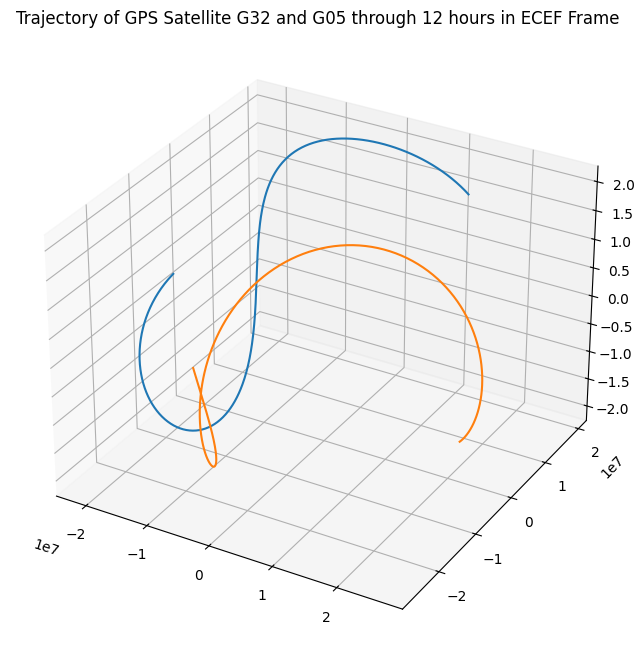

In [21]:
trajectory = sat.trajectory(
    t_sv=t_sv,
    metadata=None,
    data=data_hr0,
    interval=12 * 60 * 60,  # 12 hours
    step=100,
)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Trajectory of GPS Satellite G32 and G05 through 12 hours in ECEF Frame')
for i in range(trajectory.shape[0]):  # For each satellite
    ax.plot(trajectory[i][0], trajectory[i][1], trajectory[i][2])  # Plot the trajectory

As we can see the satellite trajectory is not exactly elliptical. This is because we observed the satellite from the earth which is rotating. To obtain the epllipse,
we have to rotate the satellite position by the earth rotation angle. 

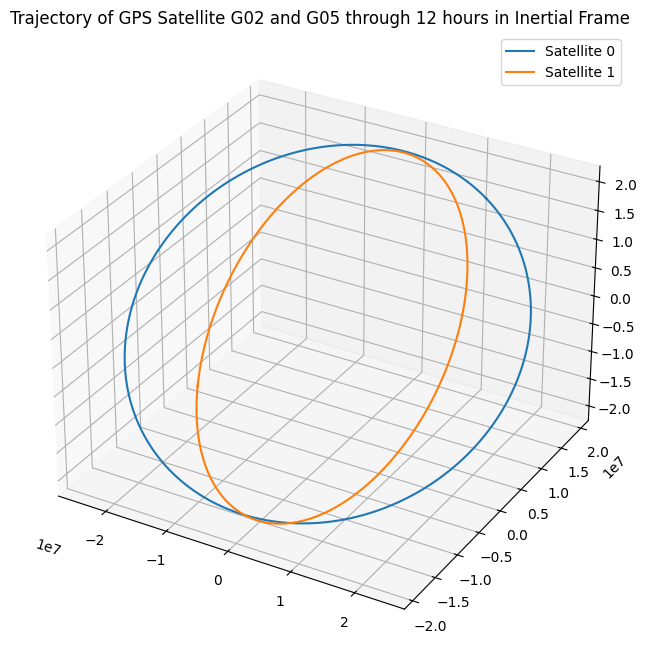

In [22]:
# Earth rotation rate
omega_e = 7.2921151467e-5  # rad/s

# Let's rotate the trajectory by 90 degrees starting from 0 index
from navigator.utility.transforms.crs_to_trs_rotations import R3

rotated_trajectory = trajectory.copy()

# For each satellite
for i in range(rotated_trajectory.shape[0]):
    # For each time step
    for j in range(rotated_trajectory.shape[2]):
        # Rotate the trajectory
        rotated_trajectory[i, :, j] = R3(-1 * omega_e * j * 100) @ rotated_trajectory[i, :, j]

# Plot the rotated trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title(
    'Trajectory of GPS Satellite G02 and G05 through 12 hours in Inertial Frame'
)
for i in range(rotated_trajectory.shape[0]):  # For each satellite
    ax.plot(
        rotated_trajectory[i][0],
        rotated_trajectory[i][1],
        rotated_trajectory[i][2],
        label=f'Satellite {i}',
    )  # Plot the trajectory

ax.legend();


## **Triangulating User Position**

### **Available Triangulation Methods**
As we now can calculate the satellite position at time of emission, we can now triangulate the user position. 

Two triangulation methods are available in the library. These are:

- Weighted Least Squares(WLS) Method (See [ESA](https://gssc.esa.int/navipedia/GNSS_Book/ESA_GNSS-Book_TM-23_Vol_I.pdf) Chapter 6 : Code Based Positioning).
- Unscented Kalman Filter (See [UKF](https://ieeexplore.ieee.org/document/882463))


### **Epoch: The Unit**
Theoretically, we don't need anything beside the rinex files to perform the triangulation. However, I have implemented a class called `Epoch` which is a wrapper around the rinex files. This class contatis the following information:
- Observation Data for a given receiver epoch
- Nearest satellite ephemeris data for a given receiver epoch
- Epoch time

This forms a unit of data for triangulation. Moreover, Epoch class also contains guards for invalid data. Let's see how the Epoch class works.

In [23]:
from navigator.utility import Epoch

# Get the epoches in the file
epoches = list(Epoch.epochify(obs=obs_file, nav=nav_file, mode='maxsv')) # Mode specifies how to pair the obs and nav data, here we are using the maximum number of satellites


This breaks down the epoches in the nav and obs files and wraps them in the `Epoch` class. Let's see how many epoches are there in the data.

In [24]:
len(epoches)

2880

There are 2880 epoches in the data which can be indivually triangulated. 

In [25]:
first_epoch = epoches[0]

In [26]:
first_epoch

Epoch(timestamp=2021-01-07 00:00:00, sv=10)

As we can see that first epoch of observation is at 2021-01-07 00:00:00  which contains 10 satellites and their ephemeris. Let's see what it contains.

In [27]:
first_epoch.obs_data

,C1C,L1C,S1C,C1W,L1W,S1W,C2X,L2X,S2X,C2W,L2W,S2W,C5X,L5X,S5X,C1X,L1X,S1X
sv,,,,,,,,,,,,,,,,,,
G05,2.525138e+07,1.326969e+08,35.50,2.525138e+07,1.326969e+08,19.00,2.525138e+07,1.034001e+08,35.75,2.525138e+07,1.034002e+08,19.00,NaN,NaN,NaN,NaN,NaN,NaN
G10,2.454162e+07,1.289671e+08,38.75,2.454162e+07,1.289671e+08,33.75,2.454162e+07,1.004938e+08,37.50,2.454162e+07,1.004938e+08,33.75,2.454161e+07,9.630658e+07,40.50,NaN,NaN,NaN
G12,2.530140e+07,1.329597e+08,35.75,2.530140e+07,1.329597e+08,19.25,2.530139e+07,1.036049e+08,36.00,2.530139e+07,1.036050e+08,19.25,NaN,NaN,NaN,NaN,NaN,NaN
G15,2.207962e+07,1.160292e+08,45.50,2.207962e+07,1.160292e+08,45.25,2.207962e+07,9.041237e+07,45.00,2.207962e+07,9.041236e+07,45.25,NaN,NaN,NaN,NaN,NaN,NaN
G18,2.069936e+07,1.087759e+08,46.50,2.069936e+07,1.087759e+08,42.50,2.069936e+07,8.476041e+07,52.75,2.069936e+07,8.476041e+07,42.50,2.069936e+07,8.122873e+07,55.25,NaN,NaN,NaN
G23,2.269568e+07,1.192666e+08,40.25,2.269568e+07,1.192666e+08,33.50,2.269568e+07,9.293503e+07,45.75,2.269568e+07,9.293503e+07,33.50,2.269568e+07,8.906273e+07,50.00,NaN,NaN,NaN
G24,2.071612e+07,1.088642e+08,48.50,2.071612e+07,1.088639e+08,52.00,2.071612e+07,8.482903e+07,52.25,2.071612e+07,8.482902e+07,52.00,2.071612e+07,8.129448e+07,56.25,NaN,NaN,NaN
G25,2.515628e+07,1.321971e+08,35.25,2.515628e+07,1.321971e+08,30.00,2.515629e+07,1.030108e+08,37.75,2.515628e+07,1.030108e+08,30.00,2.515628e+07,9.871864e+07,41.75,NaN,NaN,NaN
G29,2.223777e+07,1.168603e+08,46.75,2.223777e+07,1.168603e+08,46.50,2.223776e+07,9.105994e+07,45.50,2.223776e+07,9.105994e+07,46.50,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
first_epoch.nav_data

SVclockBias  SVclockDrift  ...  spare0  spare1
time                sv                              ...                
2021-01-07 02:00:00 G05    -0.000030 -1.023182e-12  ...     NaN     NaN
                    G10    -0.000033 -8.640200e-12  ...     NaN     NaN
                    G12     0.000016 -5.229595e-12  ...     NaN     NaN
                    G15    -0.000178  2.614797e-12  ...     NaN     NaN
                    G18     0.000339  3.069545e-12  ...     NaN     NaN
                    G23     0.000115  1.932676e-12  ...     NaN     NaN
                    G24     0.000004 -5.684342e-13  ...     NaN     NaN
                    G25     0.000055  7.617018e-12  ...     NaN     NaN
                    G29    -0.000271 -7.389644e-12  ...     NaN     NaN
                    G32     0.000013  2.160050e-12  ...     NaN     NaN

[10 rows x 31 columns]

All the navigation and observation data are stored in the `Epoch` class in their respective attribute.

In [29]:
first_epoch.station

'CUSV00THA'

Moreover, if the rinex files are named in NASA convention and taken from one of the IGS stations, the `Epoch` class can identify
the station code. This provides a way to know the coordinate of station to compare with the triangulated position.

### **Triangulating using WLS Method**

Now let's triangulate the first epoch of the data to get the user position. We need the triangulate class along with the algorithm we want to use for triangulation.

In [31]:
from navigator.satlib import Triangulate, IterativeTriangulationInterface

# Create a triangulation object
triangulator = Triangulate(interface=IterativeTriangulationInterface())

Create a `Triangulate` class instance and add the GPSIterative interface to it.

In [33]:
# Triangulate the first epoch
triangulator(obs=first_epoch, obs_metadata=obs_metadata, nav_metadata=nav_metadata) # Pass the epoch object and the metadata and we are good to go!

x        -1.132912e+06
y         6.092553e+06
z         1.504639e+06
dt        3.725028e-03
lat       1.373592e+01
lon       1.005339e+02
height    9.832120e+01
GDOP      1.578728e+00
PDOP      1.451006e+00
TDOP      6.220629e-01
HDOP      1.365292e+00
VDOP      4.913200e-01
sigma     3.534373e+01
dtype: float64

As we can see, the traingulator returns *x,y,z* coordinates of the user position with *lat, long* and *height*. The dilution of precision (DOP) is also calculated for the triangulated position.

##### **Time Series Epoch Triangulation**

We can also triangulate the whole data to get a time series of user position and see the error with respect to the time. Let's triangulate the whole data and plot the coordinates and error.

If the data is from an IGS station, we can also get the euclidean distance between the triangulated position and the station position and plot it. This is achieved by `Triangulate.igs_diff` method.

In [34]:
# Sort the epoches with respect to time
epoches.sort()

In [35]:
epoches[:10]

[Epoch(timestamp=2021-01-07 00:00:00, sv=10),
 Epoch(timestamp=2021-01-07 00:00:30, sv=10),
 Epoch(timestamp=2021-01-07 00:01:00, sv=10),
 Epoch(timestamp=2021-01-07 00:01:30, sv=10),
 Epoch(timestamp=2021-01-07 00:02:00, sv=10),
 Epoch(timestamp=2021-01-07 00:02:30, sv=10),
 Epoch(timestamp=2021-01-07 00:03:00, sv=10),
 Epoch(timestamp=2021-01-07 00:03:30, sv=10),
 Epoch(timestamp=2021-01-07 00:04:00, sv=10),
 Epoch(timestamp=2021-01-07 00:04:30, sv=10)]

Now, the epoches are linearly time spaced with 30s sampling rate! Now let's triangulate the whole data and plot the coordinates and error.

In [37]:
import pandas as pd

# Lets traingulate all the epoches
df = []

for epoch in epoches:
    df.append(triangulator.igs_diff(obs=epoch, obs_metadata=None, nav_metadata=None))

In [38]:
# Convert to dataframe for easy visualization
df = pd.DataFrame(df)

Now, we can see the dataframe of the triangulated position and the error with respect to the time.

In [40]:
df.head()

,x,y,z,dt,lat,lon,height,GDOP,PDOP,TDOP,HDOP,VDOP,sigma,diff
0,-1.132912e+06,6.092553e+06,1.504639e+06,0.003725,13.735919,100.533855,98.321197,1.578728,1.451006,0.622063,1.365292,0.491320,35.343735,23.016365
1,-1.132911e+06,6.092554e+06,1.504639e+06,0.003728,13.735913,100.533847,99.325328,1.579572,1.451762,0.622443,1.366079,0.491366,36.766667,24.220278
2,-1.132911e+06,6.092553e+06,1.504640e+06,0.003731,13.735924,100.533851,98.139646,1.580423,1.452523,0.622828,1.366870,0.491414,35.245812,22.981549
3,-1.132911e+06,6.092554e+06,1.504640e+06,0.003734,13.735920,100.533846,99.340850,1.581280,1.453289,0.623218,1.367666,0.491463,36.244704,24.271817
4,-1.132912e+06,6.092551e+06,1.504640e+06,0.003738,13.735923,100.533857,97.085675,1.582145,1.454060,0.623613,1.368468,0.491514,33.988457,21.790848


As we had 2880 epoches, we have 2880 triangulated position. Let's plot the error (diff) distribution.

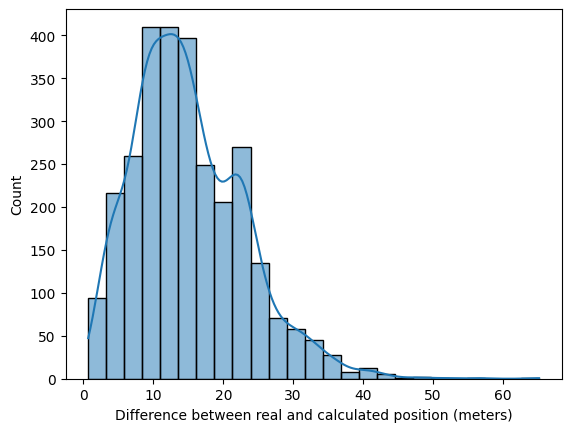

In [41]:
import seaborn as sns
ax = sns.histplot(data=df, x='diff', kde=True, bins=25)

ax.set_xlabel('Difference between real and calculated position (meters)');

Let's calcuate the statistics of the error distribution.

In [42]:
df["diff"].describe()

count    2880.000000
mean       15.069236
std         7.920357
min         0.675595
25%         9.356421
50%        13.880090
75%        20.270030
max        65.182718
Name: diff, dtype: float64

As we can see the diff is normally distributed around 15m. We are obtatining a bias of 15m in the position. 

Let's see how error varies with respect to the time.

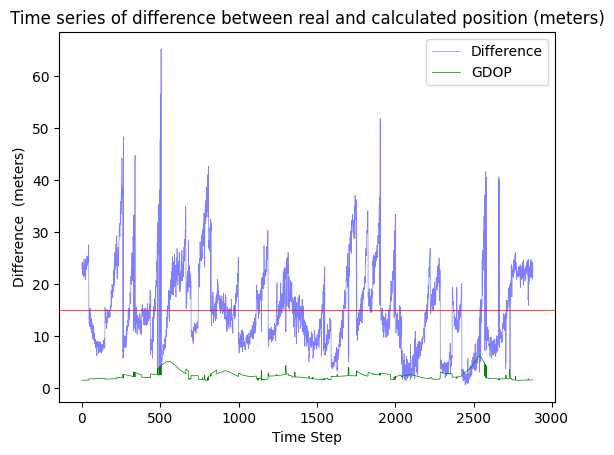

In [45]:
ax = sns.lineplot(x=df.index, y=df['diff'], linewidth=0.5, label='Difference', color='blue', alpha=0.5)
ax.set_xlabel('Time Step')
ax.set_ylabel('Difference  (meters)')
ax.set_title('Time series of difference between real and calculated position (meters)')

# Add a horizontal line at mean of the difference
ax.axhline(df['diff'].mean(), color='red', linewidth=0.5);

# Superimpose GDOP on the plot
ax.plot(df.index, df['GDOP'], linewidth=0.5, label='GDOP', color='green', alpha=1)
ax.legend();

Clearly, the error is spikin as some point. The GDOP (Geometric Dilution of Precision) is also spiking at the same time. This implies that the error is due to the satellite geometry.

Text(0.5, 1.0, 'Time series of GDOP')

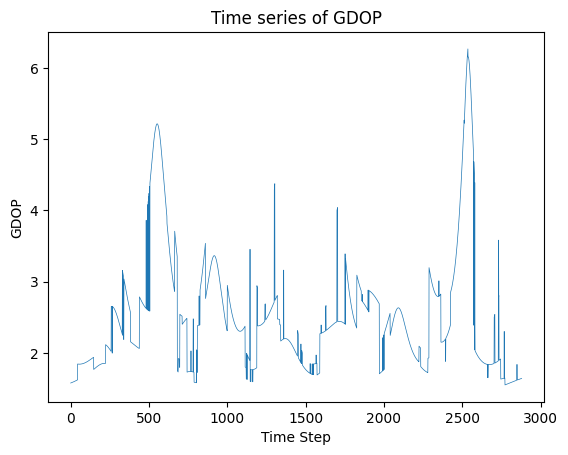

In [47]:
ax = sns.lineplot(x=df.index, y=df['GDOP'], linewidth=0.5)
ax.set_xlabel('Time Step')
ax.set_ylabel('GDOP')
ax.set_title('Time series of GDOP')


Let's scatter plot the calculated position and the station position.

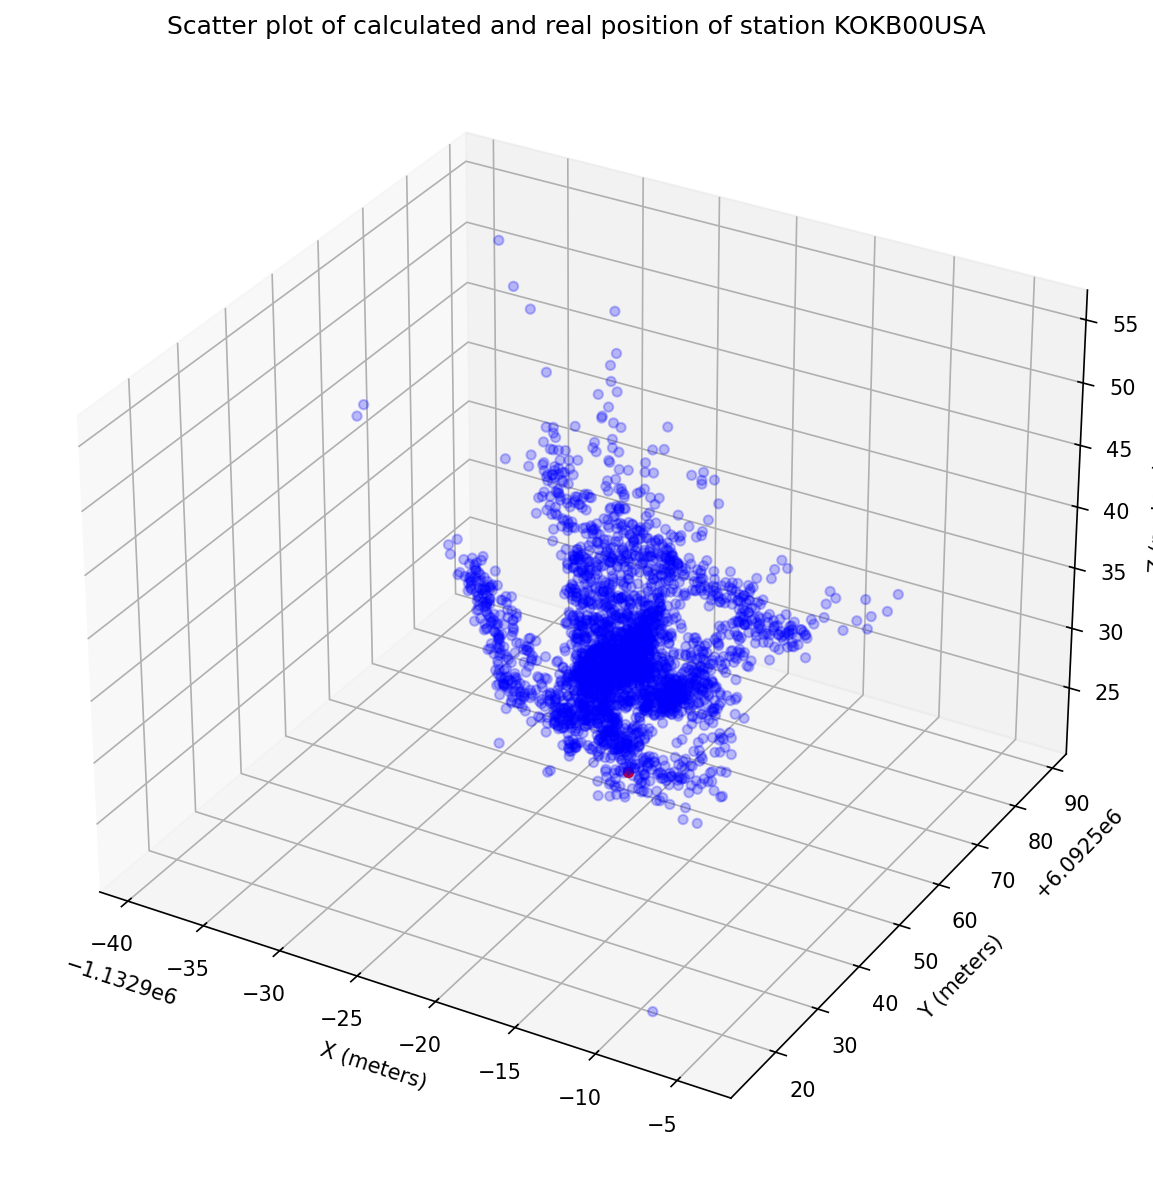

In [48]:
from navigator.utility import IGSNetwork

fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Plot the calculated positions
ax.scatter(df['x'], df['y'], df['z'], c='blue', label='Calculated Position', alpha=0.25)

# Real coords
real_coord = IGSNetwork().get_xyz(station=first_epoch.station)

# Add a red marker for real position
ax.scatter(
    real_coord[0],
    real_coord[1],
    real_coord[2],
    c='red',
    label='Real Position',
    marker='o',
    s=20,
)

ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')

ax.set_title('Scatter plot of calculated and real position of station KOKB00USA')
fig.tight_layout()

The red dot indicates the station real coordinate and the blue dots indicates the triangulated positions.

### **Triangulating using UKF Method**

In [51]:
from navigator.satlib import UnscentedKalmanTriangulationInterface

# Create a triangulation object
unscented_triangulator = Triangulate(interface=UnscentedKalmanTriangulationInterface())

Now we have the unscented kalman filter triangulator ready to use. Let's see how it predicts the user position and error. 

**Note: The UKF is not only able to predict the user position but also the velocity and clock drift.**

In [53]:
df_ukf = []

for epoch in epoches:
    df_ukf.append(unscented_triangulator.igs_diff(obs=epoch, obs_metadata=obs_metadata, nav_metadata=nav_metadata)) # The API is same as before 
    # The only difference is that we are using a different interface hence different triangulation method! 

# Convert to dataframe for easy visualization
df_ukf = pd.DataFrame(df_ukf)

**Note: The UKF only works with a time series of data since it is a filter.**

Let's see how the UKF triangulator predicts the user position and error.

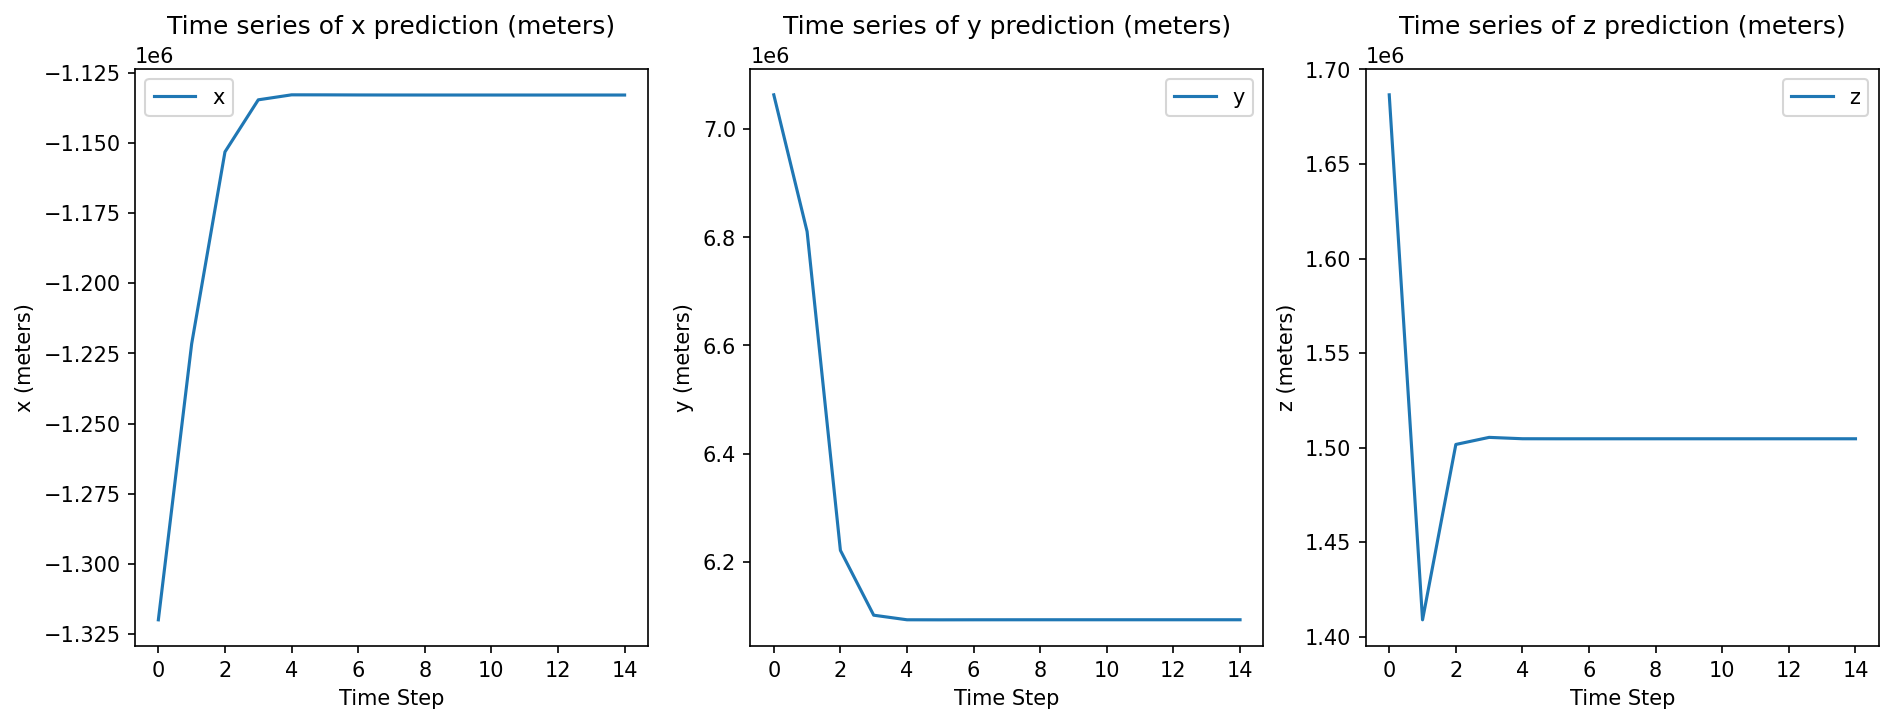

In [61]:
# Let's add a time step column
df_ukf["time_step"] = df_ukf.index

# Let's plot the first 15 timestep of the ukf prediction of dynamic variables x, y, z
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=150)


def plot_timesteps(df, start: int =0, end: int = 15, column :str = 'x', ax=None):
    """Plot the time series of a column in dataframe"""
    ax.plot(df['time_step'][start:end], df[column][start:end], label=column)
    ax.set_xlabel('Time Step')
    ax.set_ylabel(f'{column} (meters)')
    ax.set_title(f'Time series of {column} prediction (meters)')
    ax.legend()
    return ax

plot_timesteps(df_ukf, column='x', ax=ax[0]);
plot_timesteps(df_ukf, column='y', ax=ax[1]);
plot_timesteps(df_ukf, column='z', ax=ax[2]);

It seems like the UKF is converging after just 4 epoches.

Let's plot the convergence of the velocity and clock drift.

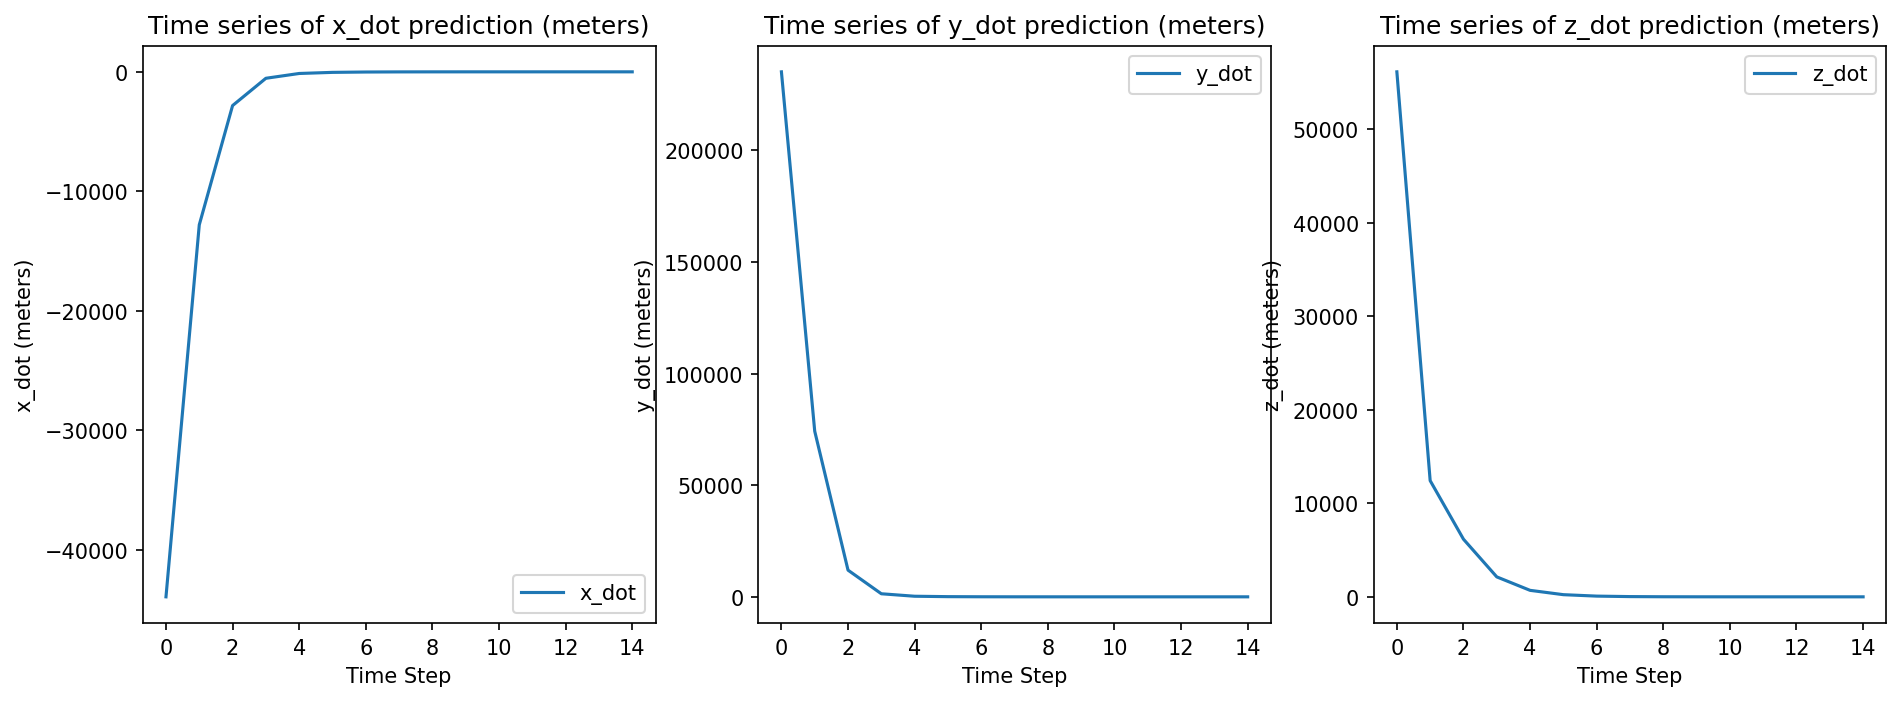

In [63]:
# Let's plot the first 15 timestep of the ukf prediction of error in velocity
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=150)

plot_timesteps(df_ukf, column='x_dot', ax=ax[0]);
plot_timesteps(df_ukf, column='y_dot', ax=ax[1]);
plot_timesteps(df_ukf, column='z_dot', ax=ax[2]);


Clearly this is a static receiver and it makes sense that the velocity and clock drift is converging to zero.

Let's see the oscilation of the error with respect to the time.

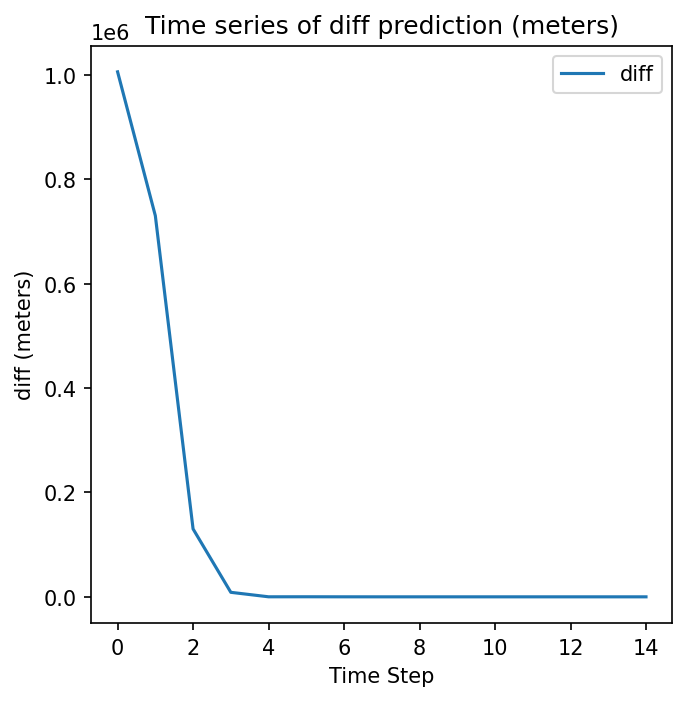

In [64]:
# Let's plot the first 15 timestep of the ukf prediction of error in position
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=150)

plot_timesteps(df_ukf, column='diff', ax=ax);

Clearly the UKF is converging to the true position. Let's see the error distribution.

Now let's see the oscillation in the clock bias and clock drift.

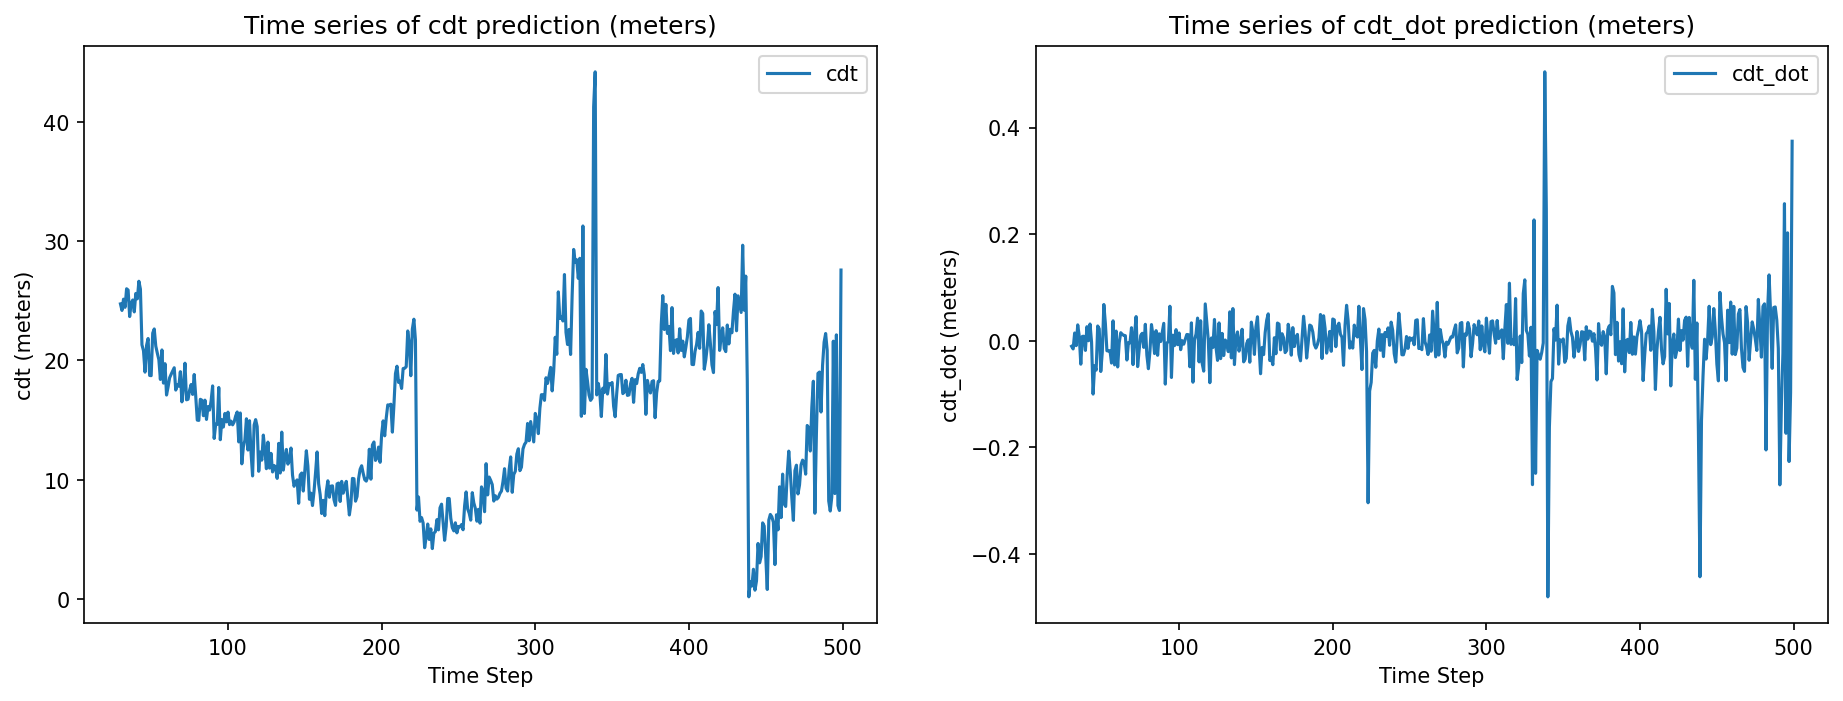

In [72]:
fig , ax = plt.subplots(1,2, figsize=(15,5), dpi=150)
plot_timesteps(df_ukf, column='cdt', ax=ax[0], start=30, end=500);
plot_timesteps(df_ukf, column='cdt_dot', ax=ax[1], start=30, end=500);

Clearlt, the clock drift is almost zero and oscillating around zero. The clock bias is also oscillating around zero. 

**Note the the units are meter here since it is multiplied by speed of light!**

Now let's plot the time series of the error just like WLS method.

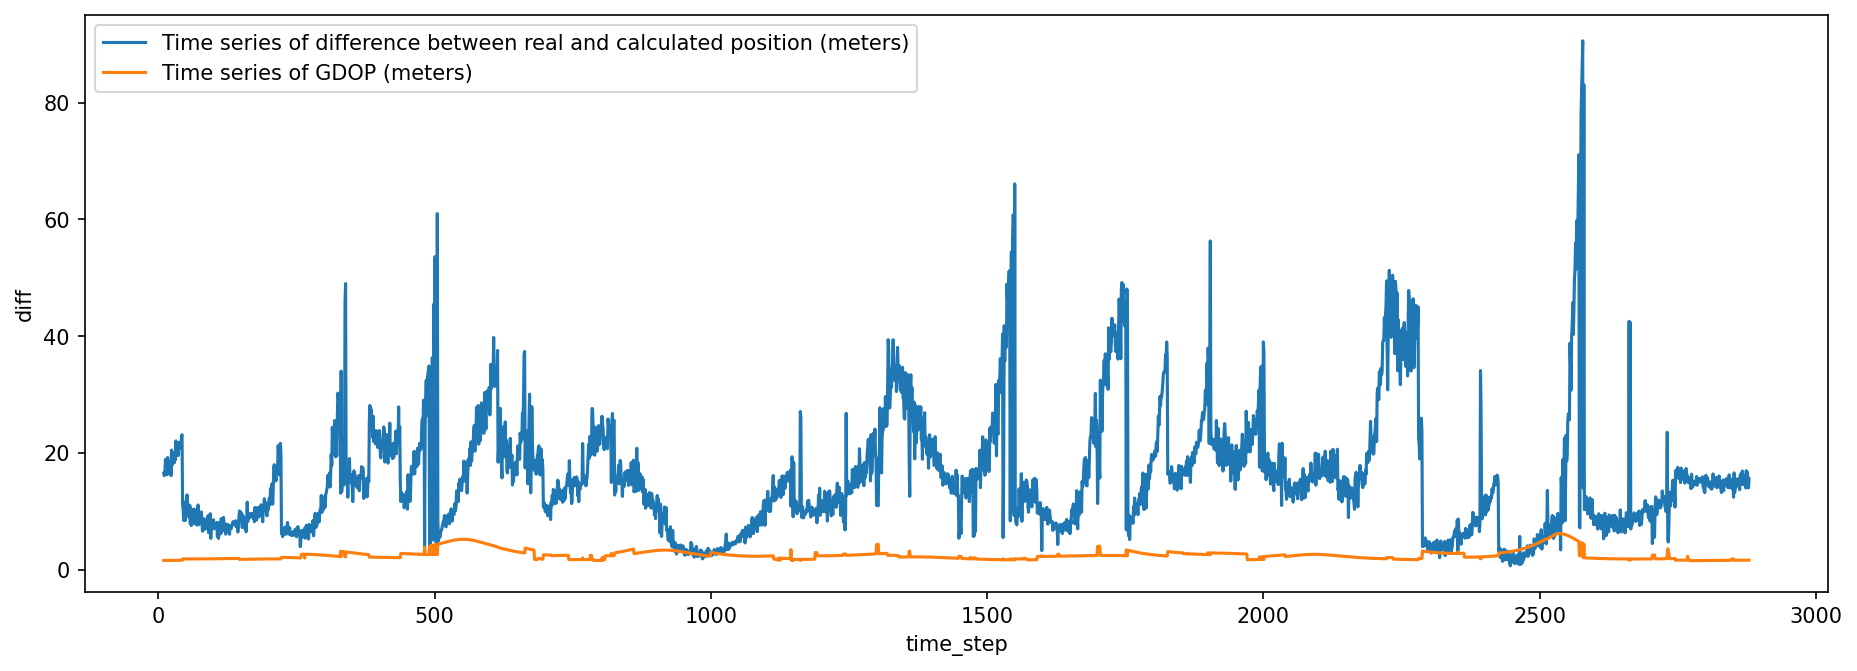

In [83]:
# We will skip the first 10 timesteps since they are too large to plot!
fig, ax = plt.subplots(1,1, figsize=(15,5), dpi=150)
ax = sns.lineplot(data=df_ukf.iloc[10:], x='time_step', y="diff", label="Time series of difference between real and calculated position (meters)", ax = ax)
ax = sns.lineplot(x=df_ukf.index[10:], y=df["GDOP"][10:], label="Time series of GDOP (meters)")

Let's 3D plot the position and true position.

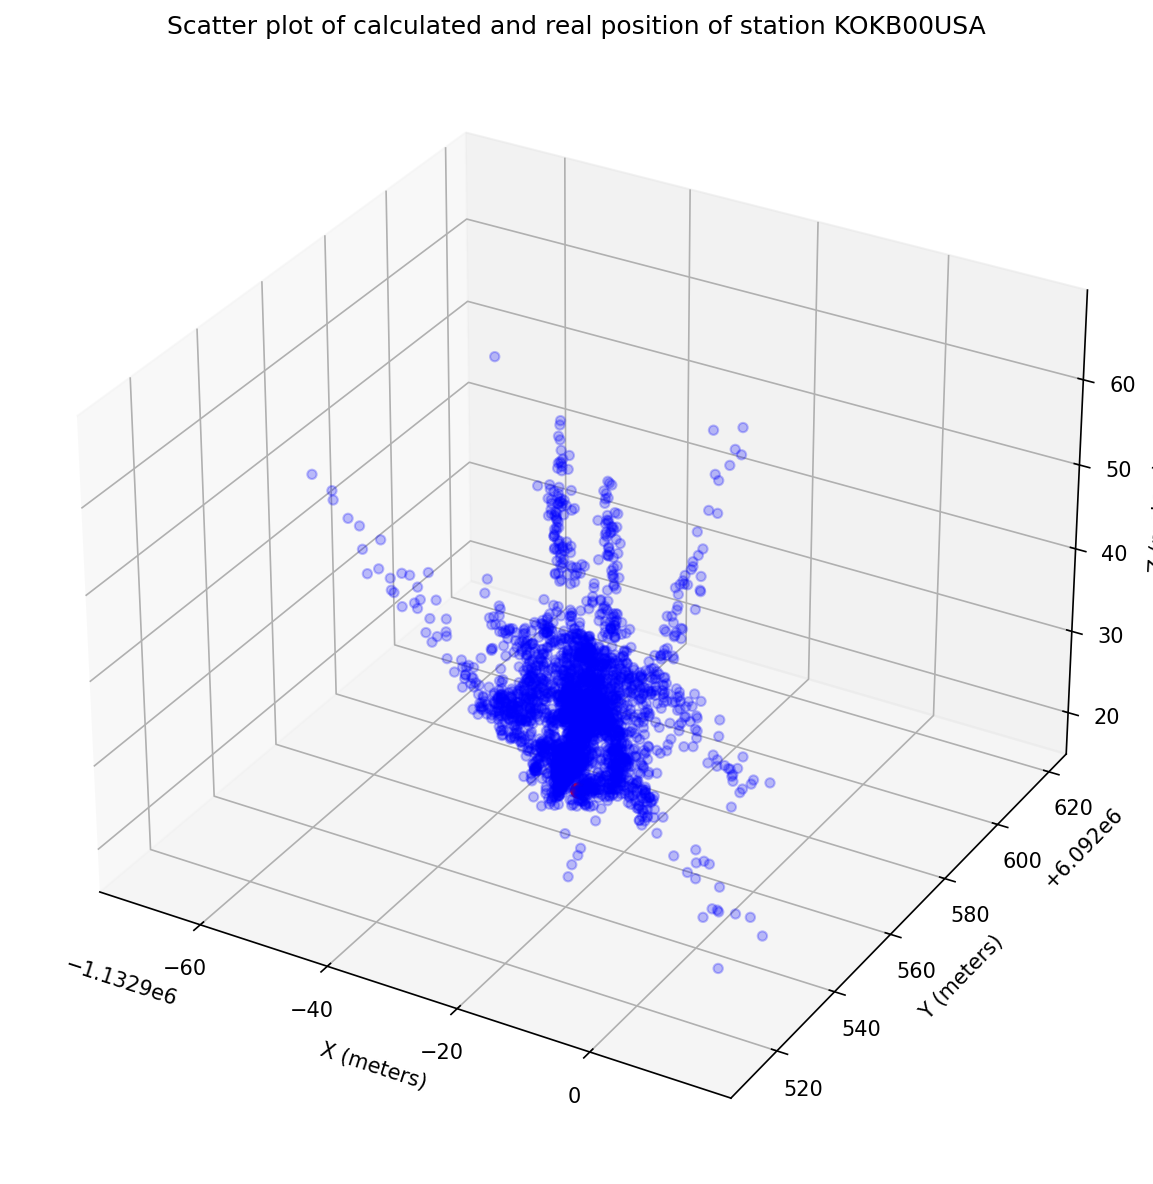

In [90]:
from navigator.utility import IGSNetwork

fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Plot the calculated positions
ax.scatter(df_ukf['x'][10:], df_ukf['y'][10:], df_ukf['z'][10:], c='blue', label='Calculated Position', alpha=0.25)

# Real coords
real_coord = IGSNetwork().get_xyz(station=first_epoch.station)

# Add a red marker for real position
ax.scatter(
    real_coord[0],
    real_coord[1],
    real_coord[2],
    c='red',
    label='Real Position',
    marker='o',
    s=50,
)

ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')

ax.set_title('Scatter plot of calculated and real position of station KOKB00USA')
fig.tight_layout()

### **Comparing WLS and UKF**

Now let's compare the WLS and UKF method. Let's plot the error distribution of both methods.

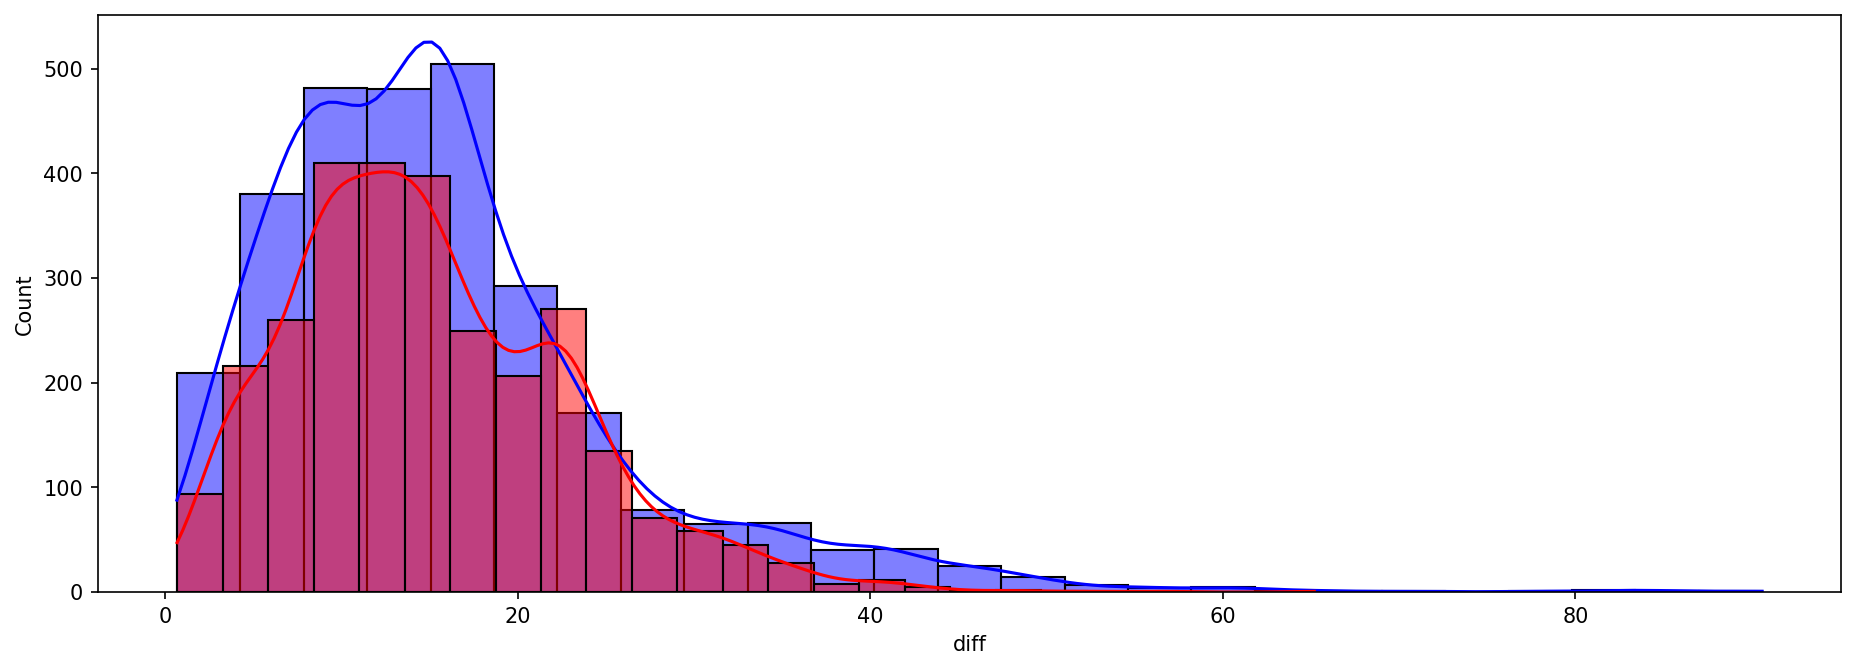

In [88]:
# Error distribution in UKF and WLS
fig, ax = plt.subplots(1,1, figsize=(15,5), dpi=150)

ax = sns.histplot(data=df_ukf[10:], x='diff', kde=True, bins=25, label='UKF', color='blue', alpha=0.5)
ax = sns.histplot(data=df, x='diff', kde=True, bins=25, label='WLS', color='red', alpha=0.5)

Clearly, the UKF probability distribution is a bit more centered!

Let's plot the error time series of both methods.

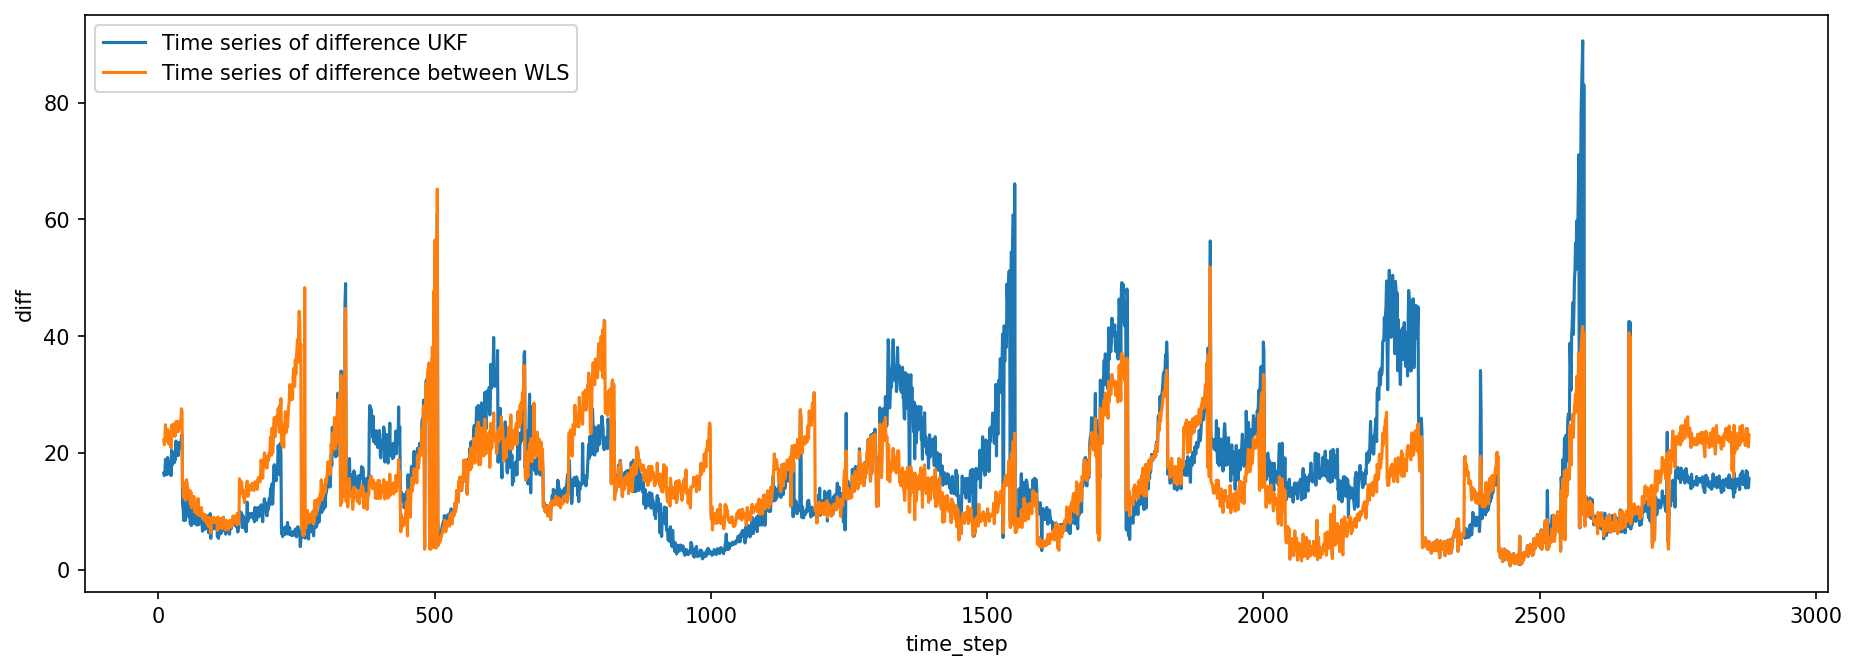

In [95]:
fig , ax = plt.subplots(1,1, figsize=(15,5), dpi=150)

ax = sns.lineplot(data=df_ukf[10:], x='time_step', y="diff", label="Time series of difference UKF", ax = ax)
ax = sns.lineplot(x=df[10:].index, y=df["diff"][10:], label="Time series of difference between WLS", ax = ax)

## **Conclusion**

The library demonstrates its ability to parse RINEX files and calculate PVT solutions. Each component within the library operates independently, enabling its use with other GNSS systems such as GLONASS, Galileo, etc. Furthermore, it can handle the download, storage, and processing of large batches of RINEX files.

The two triangulation interface seems to be performing similarly. However, the UKF is able to predict the velocity and clock drift which is not easy with WLS method. Moreover, the UKF can be tuned by user to get better results.

## **Future Works**

We've developed a comprehensive, modular, and scalable library for GNSS navigation and positioning. However, several tasks remain outstanding. Here are some key areas for future development, along with the necessary skill sets:

1. **Addition of Other Constellations** \
    This requires a good understanding of RINEX format, rinex parsing, satellite ephemeris and the `satlib` module. This task requires a good understanding of the navigator library and its inner workings. The candidate should also have a good understanding of the `satlib` module and its classes.
2. **Addition of Other Triangulation Methods** \
    The library can be improved by adding models for ionospheric and tropospheric corrections. Moreover Single Difference and Double Difference methods can be added to the library for improved accuracy. This task requires a good understanding of the `triangulate` module and its classes. The candidate should also have a good understanding of the `satlib` module and its classes.
3. **Extending the parsing RINEX files to v4** \
    Ideally, this should be done by a candidate who has a good knowledge of programming in Python and software engineering (CS majors after sophmore year). Adapeters need to be written to make the rinex files compatible with the current library data format of `pandas.Dataframe`. Parsing format is tightly coupled with other modules like `satlib` and `triangulate`. Hence, the candidate should have a good understanding of the library and its modules.


## **AI/ML integration into the GNSS toolkit** 


 There are many places where AI/ML can be integrated into the GNSS problem. While doing some research, these are few places where AI/ML can be integrated into the GNSS problem:

1. **PINNs based Satellite Orbit Prediction** \
    The satellite brocast ephemeris are accurate upto 1m, see [SP3](../../intro/intro_sp3_orbit.ipynb) and increases exponentially if user tries to predict the obrbit for more that 150 minutes. This is due to the fact that the satellite orbits are pertubed by the gravitational forces of the sun, moon, earth's oblateness, solar wind! A basic model of pertubation theory can be developed for the satellite orbit which includes known pertubations. The rest of the unknown pertubations can be learned by PINNs (Physics Informed Neural Networks) to model the orbit of the satellite accurately.

    This has and added advantage that if we develop such a model, we can predict the orbit of the satellite for certaion time period and simulate the real satellite constellation. This can be used to test the GNSS receiver in the lab.

2. **AI based Triangulation** \
    There is a very good paper on Set Transformer based GNSS positioning. The paper can be found [here](https://arxiv.org/abs/2110.09581). The paper uses Set Transformer to iteratevly correct the user position. The paper is very interesting and can be used to improve the triangulation method in the library.

3. **AI based GNSS filtering** \
    For the time series data, neural networks like [KalmanNet](https://arxiv.org/pdf/2107.10043.pdf) which is based on Recurrent Neural Network can be used to filter the GNSS data. This can be used to improve the triangulation method in the library. Using the single differenced and phase correction method, the triangulation can be stablized and improved.


Other ideas are welcome and can be discussed with the lab members.

## **References**

### ESA Data Processing and Analysis Consortium (DPAC) GNSS Book

- Sanz Subirana, J., Juan Zornoza, J.M., Hernández-Pajares, M. (2013). GNSS Data Processing, Vol. 1: Fundamentals and Algorithms (ESA TM-23/1). Noordwijk, the Netherlands: ESA Communications. ISBN 978-92-9221-886-7.

- Sanz Subirana, J., Juan Zornoza, J.M., Hernández-Pajares, M. (2013). GNSS Data Processing, Vol. 2: Laboratory exercises (ESA TM-23/2). Noordwijk, the Netherlands: ESA Communications. ISBN 978-92-9221-886-7.


### Interface Control Document ICD-GPS-200

- Interface Specification IS-GPS-200. (2922). Retrieved from GPS.gov: [https://www.gps.gov/technical/icwg/IS-GPS-200N.pdf]

### Set Transformer based GNSS Positioning
Kanhere, Ashwin & Gupta, Shubh & Shetty, Akshay & Gao, Grace. (2021). Improving GNSS Positioning using Neural Network-based Corrections. 

### KalmanNet

G. Revach, N. Shlezinger, R. J. G. van Sloun and Y. C. Eldar, "Kalmannet: Data-Driven Kalman Filtering," ICASSP 2021 - 2021 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), Toronto, ON, Canada, 2021, pp. 3905-3909, doi: 10.1109/ICASSP39728.2021.9413750.